# Evaluation of Streaming in MassesCorpus

In [1]:
import music21 as m21
import copy
import sys
import os
import time
#import pygame

import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from collections import OrderedDict
import pickle

import pingouin as pg

In [2]:
# import symbolic auditory streaming analysis functions from asc.py file
%load_ext autoreload
%autoreload 1
%aimport asc

# Test eval

In [3]:
os.chdir('/Users/finn/Documents/DDMAL/Scores/masses_all')
files = os.listdir()
files = sorted(files)
f = files[26]
print(f)

score = m21.converter.parse(f)

Ano1026e-Missa_Gross_senen-Agnus.krn


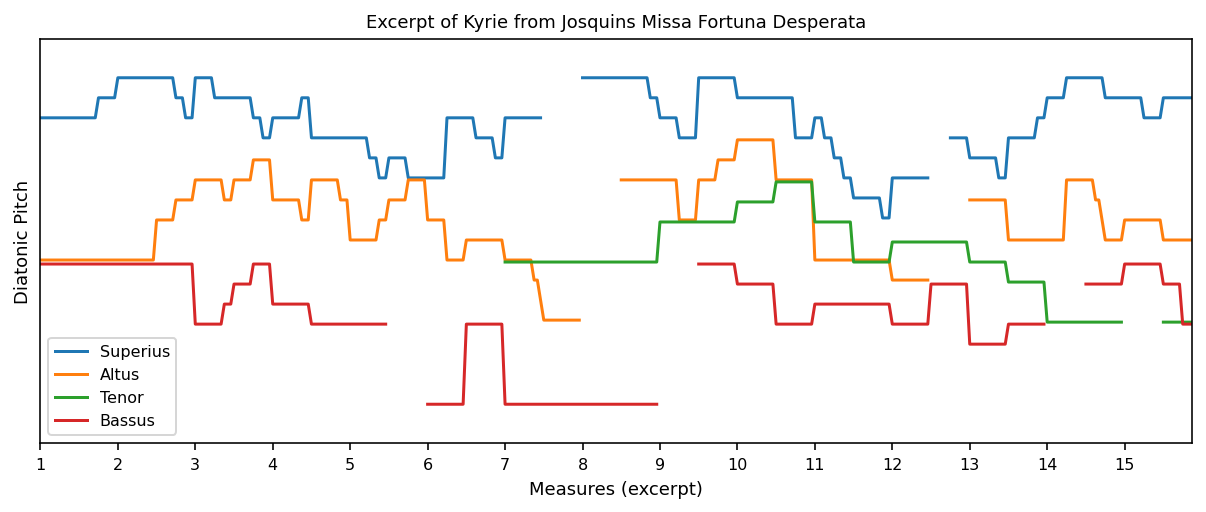

In [11]:

# plot of polyphony excerpt 
df_pitchs = asc.Score_Pitch_Steps(score)
x_r = np.array([0,119])

fig= plt.figure(figsize=(10,4))
axes= fig.add_axes([0.1,0.2,0.8,0.7])
clabels = df_pitchs.columns
for i in range(len(clabels)):    
    axes.plot(df_pitchs[clabels[i]]+-.1*i)
step = np.min(np.diff(df_pitchs.index))
#plt.grid(color='k', linestyle=':', linewidth=1)
axes.legend(('Superius', 'Altus', 'Tenor','Bassus'),fontsize=8)
axes.set_yticks([])
axes.xaxis.set_ticks(np.arange(0,118,8))
axes.xaxis.set_ticklabels(np.arange(1,16),fontsize=8)
plt.xlabel('Measures (excerpt)',fontsize=9)
plt.ylabel('Diatonic Pitch',fontsize=9)
plt.title('Excerpt of Kyrie from Josquin''s Missa Fortuna Desperata',fontsize=9)
axes.set_xbound(lower=x_r[0], upper=x_r[1])
plt.show()


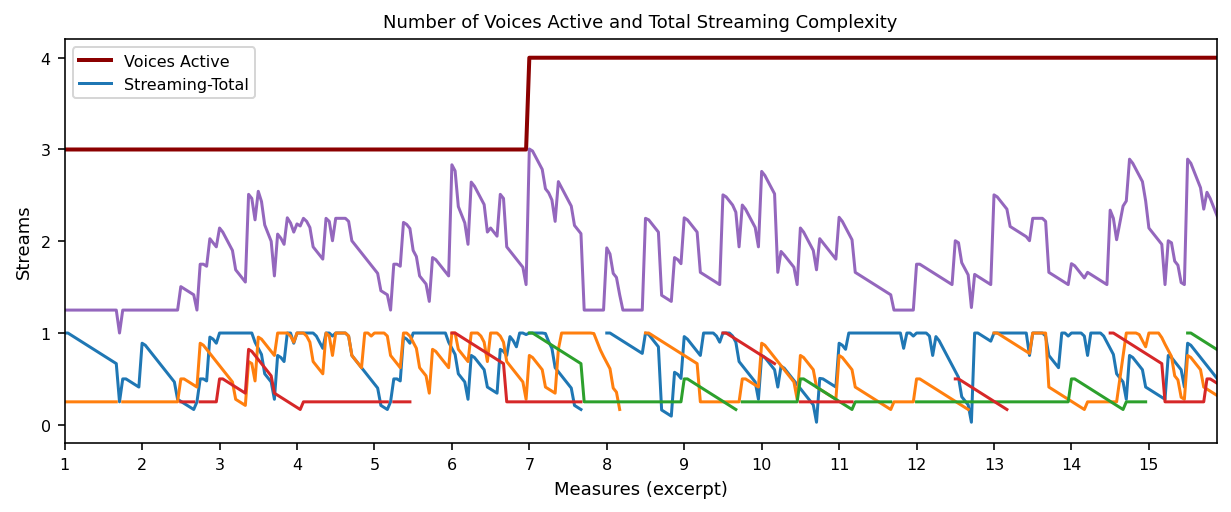

In [12]:

# onsets and countpoint
df_seperated = asc.Streaming(score)
A = asc.Voice_Count(score)
x_r = np.array([0,119])
fig= plt.figure(figsize=(10,4))
axes= fig.add_axes([0.1,0.2,0.8,0.7])
axes.plot(A,color='darkred',linewidth=2)
axes.plot(df_seperated)
#axes.fill_between(df_seperated.index,df_seperated['Total'],0,color="c")
axes.set_xbound(lower=x_r[0], upper=x_r[1])
axes.xaxis.set_ticks(np.arange(0,118,8))
axes.xaxis.set_ticklabels(np.arange(1,16),fontsize=8)
plt.xlabel('Measures (excerpt)',fontsize=9)
locs, labels = plt.yticks(np.arange(0, 5, step=1),fontsize=8)
#plt.grid(color='k', linestyle=':', linewidth=1)
plt.ylabel('Streams',fontsize=9)
axes.legend(('Voices Active', 'Streaming-Total'),fontsize=8)
plt.title('Number of Voices Active and Total Streaming Complexity',fontsize=9)

plt.show()

# Run Masses

In [ ]:
Counterpoint_seperated = []
Voices_counted = []
df=pd.DataFrame(columns=['Mass','MassID','Mvnt','MvntN','Composer','CompID','file'])
massNames = []

os.chdir('/Users/finn/Documents/DDMAL/Scores/masses_all')
files = os.listdir()
files = sorted(files)
tic = time.time()

# composer mapping 
composer_map = {'Agr':'Alexander Agricola','Ano':'Anonymus','Bru':'Antione Brumel','Bus':'Antoine Busnoys','Das':'Ludwig Daser','Duf':'Guillaume Du Fay','Fva':'Antoine de Fevin','Jos':'Josquin des Prez','Mar':'Johannes Martini','Obr':'Obrecht','Ock':'Johannes Ockeghem','Ort':'Marbrianus de Orto','Pip':'Pipelare','Rue':'Pierre de la Rue','Tin':'Johannes Tinctoris','Unj':'Unverified Josquin'}
masses_unv_Jos = ['Jos0302','Jos0304','Jos0401','Jos0404','Jos0405','Jos0406','Jos0501','Jos0502','Jos0601','Jos0602','Jos0701','Jos0902','Jos0903','Jos0904','Jos1001','Jos1002','Jos1003','Jos1201']
movement_No = 1

for f in files:
    if f.endswith('krn'):
        a = f.split('-')
        m_id = a[0][:7]
        c_id = a[0][:3]
        if m_id in masses_unv_Jos: c_id = 'Unj'      
        mass_name = a[1]
        endbit = a[-1].split('.')
        a[-1] = endbit[0]
        movement = a[2]
        if len(a)>3: mass_name += '-' + a[-1]
        if not mass_name in massNames: massNames.append(mass_name)
        score = m21.converter.parse(f)
        # onsets and countpoint
        df_seperated = asc.Streaming(score)
        Counterpoint_seperated.append(df_seperated['Total'])
        # onsets
        Voices_counted.append(asc.Voice_Count(score))
            
        df = df.append({'Mass':mass_name,'MassID':m_id,'Mvnt':movement,'MvntN':movement_No,'Composer':composer_map[c_id],'CompID':c_id,'file':f},ignore_index=True)

        toc = time.time()
        print(str(toc-tic) + 's ' + m_id + ': ' + movement + ' ' + str(movement_No))
        
print(len(df))
print(len(massNames))


In [7]:
# save these results from the last above cell
os.chdir('/Users/finn/Documents/DDMAL/Scores')
Series_Complexities={'MusicIndex':df,'Streaming_Complexity':Counterpoint_seperated,'Voice_Counts':Voices_counted}
f=open('Masses_CompSeries_Stream3_1.pkl','wb')
pickle.dump(Series_Complexities,f,-1)
f.close()

In [8]:
# retreive the last round of evaluations

os.chdir('/Users/finn/Documents/DDMAL/Scores')
f=open('Masses_CompSeries_Stream3_1.pkl','rb')
S_Complexities=pickle.load(f)
f.close()

df = S_Complexities['MusicIndex']
Counterpoint_seperated = S_Complexities['Streaming_Complexity']
Voices_counted = S_Complexities['Voice_Counts']

os.chdir('/Users/finn/Documents/DDMAL/Scores/masses_all')


In [ ]:
os.chdir('/Users/finn/Documents/DDMAL/Scores/masses_all/Palestrina/')

files = os.listdir()
files = sorted(files)

mvmt = ['Kyrie','Gloria','Credo','Sanctus','Agnus']
massNames = []

composer = 'Giovanni Pierluigi da Palestrina'
c_id = 'Pal'
tic = time.time()

appended = True

for i in range(len(files)):
    f = files[i]
    if f.endswith('mid'):
        movement_No = 1
        a = f.split('_')
        appendprevious = False
        appendnext = False
        
        if a[-2].startswith('I'):
            movement = a[-3]
            mass_name = 'Missa_'+'_'.join(a[:-3])
            
            if a[-2] == 'II':  # should it append a previous file or a following 
                if abs(len(files[i-1])-len(f))<4:
                    if files[i-1][:len(f)-8] ==f[:len(f)-8]:
                        appendprevious = True
                        print('      this:' + f)
                        print('      last:' + files[i-1])
                if abs(len(files[i+1])-len(f))<4:        
                    if files[i+1][:len(f)-8] == f[:len(f)-8]:
                        appendprevious = False
                        appendnext = True
                        appended = False
                        f_II = f
                        print('      this:' + f)
                        print('      next:' + files[i+1])
        else: 
            movement = a[-2]
            mass_name = 'Missa_'+'_'.join(a[:-2])
        
        if not mass_name in massNames:
                massNames.append(mass_name)    
        m_id = c_id + str(1000 + len(massNames))
        
        
        if movement.startswith('Bene') or appendnext: # skip this file and return later
            if movement.startswith('Bene'):
                b_f = f
                b_mass = mass_name
                b_move = movement
            print('holding off eval on ' + f)
        else:

            if appendprevious:  
                score = m21.converter.parse(f) 
                # Eval streaming on this last bit, shift index and add to that final stream
                df_seperated = asc.Streaming(score)
                df_seperated['Total'].index = df_seperated['Total'].index + max(Counterpoint_seperated[-1].index) + 2
                Counterpoint_seperated[-1] = Counterpoint_seperated[-1].append(df_seperated['Total'])

                df_seperated = asc.Voice_Count(score)
                df_seperated.index = df_seperated.index + max(Voices_counted[-1].index) + 2
                Voices_counted[-1] = Voices_counted[-1].append(df_seperated)

                movement_No = 2
                df.iloc[-1,df.columns.get_loc('MvntN')] = movement_No 
                appendprevious = False
                toc = time.time()
                print(str(toc-tic) + 's ' + m_id + ': ' + movement + ' ' + str(movement_No))
                print('Appended ' + f + 'to previous movement ' + df.iloc[-1,df.columns.get_loc('Mvnt')])
                
            else: 
                score = m21.converter.parse(f)
                # onsets and countpoint
                df_seperated = asc.Streaming(score)
                Counterpoint_seperated.append(df_seperated['Total'])
                # voices active
                df_seperated = asc.Voice_Count(score)
                Voices_counted.append(df_seperated)
                toc = time.time()
                print(str(toc-tic) + 's ' + m_id + ': ' + movement + ' ' + str(movement_No))

                if movement == 'Sanctus':
                    if mass_name == b_mass: # eval and append benedictus
                        print('Found ' + f + ' for ' + b_f)
                        score = m21.converter.parse(b_f) 
                        # Eval streaming on this last bit, shift index and add to that final stream
                        df_seperated = asc.Streaming(score)
                        df_seperated['Total'].index = df_seperated['Total'].index + max(Counterpoint_seperated[-1].index) + 2
                        Counterpoint_seperated[-1] = Counterpoint_seperated[-1].append(df_seperated['Total'])

                        df_seperated = asc.Voice_Count(score)
                        df_seperated.index = df_seperated.index + max(Voices_counted[-1].index) + 2
                        Voices_counted[-1] = Voices_counted[-1].append(df_seperated)
                        movement_No = 2
                        toc = time.time()
                        print(str(toc-tic) + 's ' + m_id + ': ' + movement + ' ' + str(movement_No))
                
                if not appended:
                        print('Found ' + f + ' for ' + f_II)
                        score = m21.converter.parse(f_II) 
                        # Eval streaming on this last bit, shift index and add to that final stream
                        df_seperated = asc.Streaming(score)
                        df_seperated['Total'].index = df_seperated['Total'].index + max(Counterpoint_seperated[-1].index) + 2
                        Counterpoint_seperated[-1] = Counterpoint_seperated[-1].append(df_seperated['Total'])

                        df_seperated = asc.Voice_Count(score)
                        df_seperated.index = df_seperated.index + max(Voices_counted[-1].index) + 2
                        Voices_counted[-1] = Voices_counted[-1].append(df_seperated)
                        movement_No = 2
                        appended = True
                        toc = time.time()
                        print(str(toc-tic) + 's ' + m_id + ': ' + movement + ' ' + str(movement_No))
                df = df.append({'Mass':mass_name,'MassID':m_id,'Mvnt':movement,'MvntN':movement_No,'Composer':composer,'CompID':c_id,'file':f},ignore_index=True)
#                 toc = time.time()
#                 print(str(toc-tic) + 's ' + m_id + ': ' + movement + ' ' + str(movement_No))

            
        
print(len(df))
print(len(Counterpoint_seperated))
print(len(Voices_counted))
print(len(massNames))




In [10]:
# save these results from the last above cell
os.chdir('/Users/finn/Documents/DDMAL/Scores')
Series_Complexities={'MusicIndex':df,'Streaming_Complexity':Counterpoint_seperated,'Voice_Counts':Voices_counted}
f=open('Masses_CompSeries_Stream3_2.pkl','wb')
pickle.dump(Series_Complexities,f,-1)
f.close()

In [11]:
# retreive the last round of evaluations

os.chdir('/Users/finn/Documents/DDMAL/Scores')
f=open('Masses_CompSeries_Stream3_2.pkl','rb')
S_Complexities=pickle.load(f)
f.close()

df = S_Complexities['MusicIndex']
Counterpoint_seperated = S_Complexities['Streaming_Complexity']
Voices_counted = S_Complexities['Voice_Counts']

os.chdir('/Users/finn/Documents/DDMAL/Scores/masses_all')


In [12]:
print(len(df))
print(len(Counterpoint_seperated))
print(len(Voices_counted))
print(len(massNames))




961
961
961
101


In [ ]:
os.chdir('/Users/finn/Documents/DDMAL/Scores/masses_all/Victoria/')
files = os.listdir()
files = sorted(files)

mvmt = ['Kyrie','Gloria','Credo','Sanctus','Benedictus','Agnus']
composer = 'Tomás Luis de Victoria'
c_id = 'Vic'
tic = time.time()
massNames = []

for i in range(len(files)):
    f = files[i]
    if f.endswith('mid'): 
        a = f.split('-')
        # ignore the number of voices listed in the title?
        movement_No = 1
        endbit = a[-1].split('.')
        a[-1] = endbit[0]
        movement = a[-1]
        mass_name = 'Missa_'+a[0]
        if not mass_name in massNames:
                massNames.append(mass_name)
        m_id = c_id + str(1000 + len(massNames))

        
        if movement.startswith('Benedictus'):
           # this file has already been dealth with, keep trucking along 
            print(' skipping ' + movement + ' ' + f)
        
        else:
        # weird compromises for different divisions of the mass and changing terminology
            score = m21.converter.parse(f) 
            # onsets and countpoint
            df_seperated = asc.Streaming(score)
            Counterpoint_seperated.append(df_seperated['Total'])
            # voices active
            df_seperated = asc.Voice_Count(score)
            Voices_counted.append(df_seperated)
            
            if movement == 'Sanctus': # look for Benedictus
                g = files[i+1]
                if g.endswith('mid'): 
                    a = g.split('-')
                    # ignore the number of voices listed in the title?
                    endbit = a[-1].split('.')
                    a[-1] = endbit[0]
                    movement2 = a[-1]
                    if movement2.startswith('Benedic'):
                        print('Found ' + movement + ' ' + g)
                        score = m21.converter.parse(g) 
                        # Eval streaming on this last bit, shift index and add to that final stream
                        df_seperated = asc.Streaming(score)
                        df_seperated['Total'].index = df_seperated['Total'].index + max(Counterpoint_seperated[-1].index) + 2
                        Counterpoint_seperated[-1] = Counterpoint_seperated[-1].append(df_seperated['Total'])

                        df_seperated = asc.Voice_Count(score)
                        df_seperated.index = df_seperated.index + max(Voices_counted[-1].index) + 2
                        Voices_counted[-1] = Voices_counted[-1].append(df_seperated)
                        movement_No = 2

            if movement.startswith('Sanctus_y_'): movement = 'Sanctus' # for Sanctus-y-Benedictus
            if movement.startswith('Agnus'): movement = 'Agnus' 
            df = df.append({'Mass':mass_name,'MassID':m_id,'Mvnt':movement,'MvntN':movement_No,'Composer':composer,'CompID':c_id,'file':f},ignore_index=True)

            toc = time.time()
            print(str(toc-tic) + 's ' + m_id + ': ' + movement + ' ' + str(movement_No))


                   
print(len(df))
print(len(Counterpoint_seperated))
print(len(Voices_counted))
print(len(massNames))


In [ ]:
# save these results from the last above cell
os.chdir('/Users/finn/Documents/DDMAL/Scores')
Series_Complexities={'MusicIndex':df,'Streaming_Complexity':Counterpoint_seperated,'Voice_Counts':Voices_counted}
f=open('Masses_CompSeries_Stream3_3.pkl','wb')
pickle.dump(Series_Complexities,f,-1)
f.close()

In [15]:
# retreive the last round of evaluations

os.chdir('/Users/finn/Documents/DDMAL/Scores')
f=open('Masses_CompSeries_Stream3_3.pkl','rb')
S_Complexities=pickle.load(f)
f.close()

MusicIndex = S_Complexities['MusicIndex']
Counterpoint_seperated = S_Complexities['Streaming_Complexity']
Voices_counted = S_Complexities['Voice_Counts']

os.chdir('/Users/finn/Documents/DDMAL/Scores/masses_all')
print(len(MusicIndex))
print(len(Counterpoint_seperated))
print(len(Voices_counted))




1051
1051
1051


Mass              Missa_Laetatus_Sum
MassID                       Vic1008
Mvnt                           Credo
MvntN                              1
Composer      Tomás Luis de Victoria
CompID                           Vic
file        Laetatus_Sum-3-Credo.mid
Name: 998, dtype: object


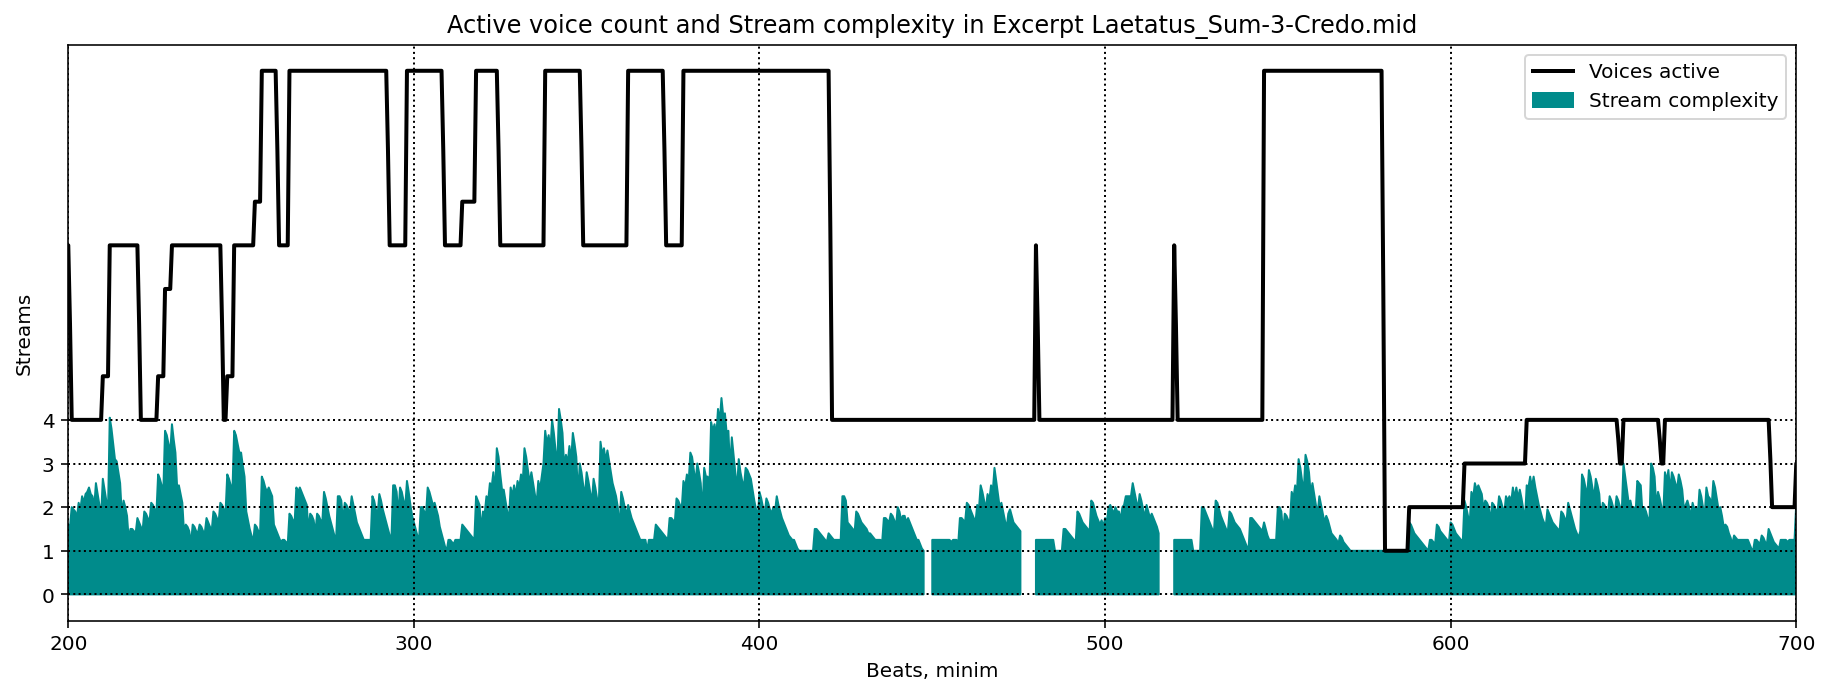

1.9325313807531381
4.55
7.249723087573555
1444.0


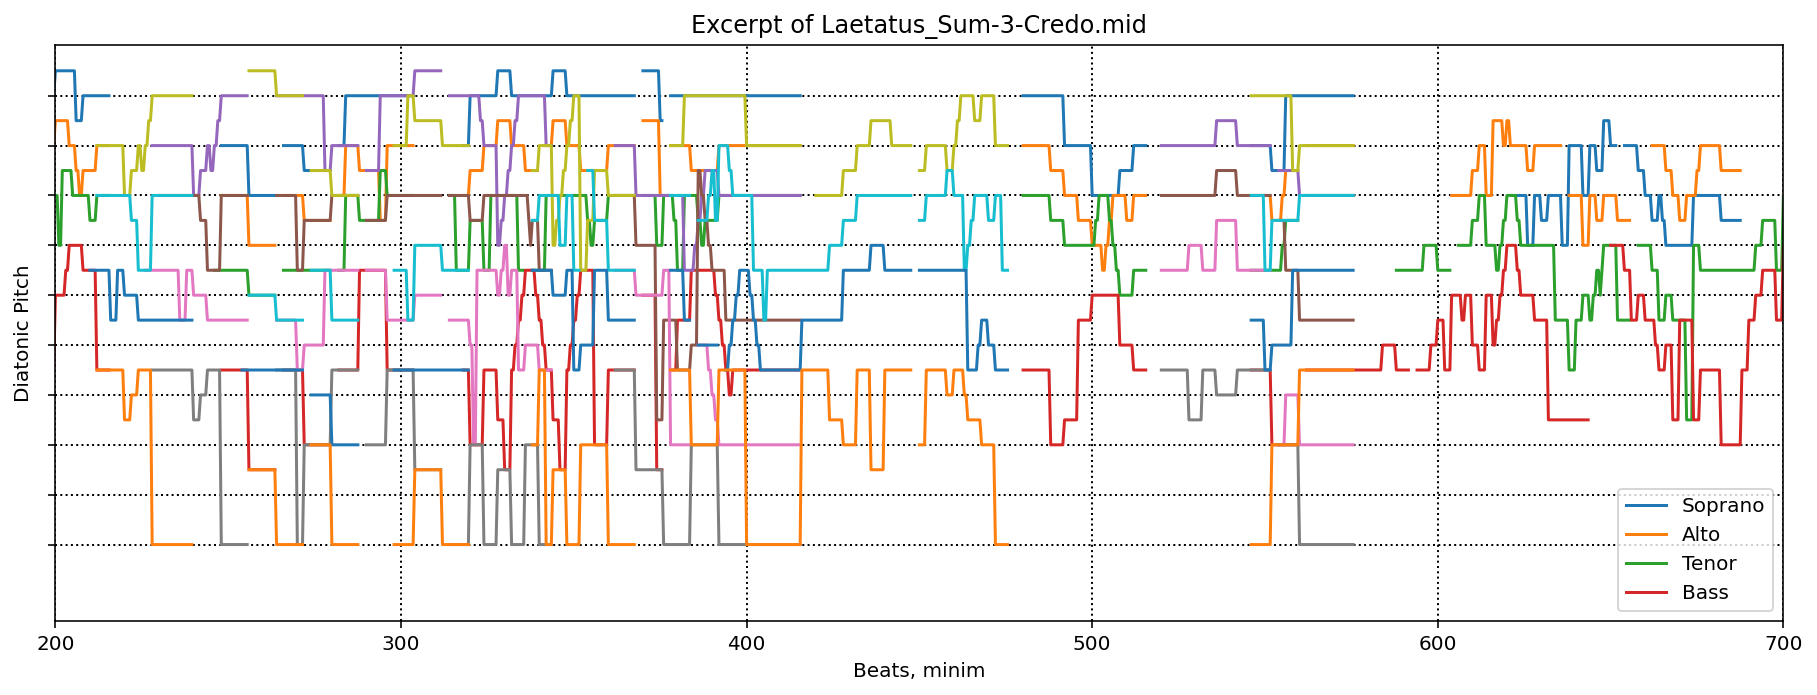

In [18]:
# test the outputs of 
piece = 998

df_seperated = Counterpoint_seperated[piece]
A = Voices_counted[piece]
dets = MusicIndex.loc[piece,:]
print(dets)

os.chdir('/Users/finn/Documents/DDMAL/Scores/masses_all/Victoria/')
score = m21.converter.parse(dets.file)
df_pitchs = asc.Score_Pitch_Steps(score)

x_r = np.array([200,700])
os.chdir('/Users/finn/Documents/DDMAL/dev/complexity/masses')



fig= plt.figure(figsize=(15,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(A,color="k",linewidth=2)
axes.fill_between(df_seperated.index,df_seperated,0,color="darkcyan")
axes.set_xbound(lower=x_r[0], upper=x_r[1])
locs, labels = plt.yticks(np.arange(0, 5, step=1))
plt.grid(color='k', linestyle=':', linewidth=1)
plt.xlabel('Beats, minim')
plt.ylabel('Streams')
axes.legend(('Voices active', 'Stream complexity'))
plt.title('Active voice count and Stream complexity in Excerpt ' + dets.file)
plt.show()

print(df_seperated.mean())
print(df_seperated.max())
print(A.mean())
print(A.index[-1])

fig= plt.figure(figsize=(15,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(df_pitchs)
step = np.min(np.diff(df_pitchs.index))
plt.grid(color='k', linestyle=':', linewidth=1)
axes.legend(('Soprano', 'Alto', 'Tenor','Bass'))
axes.yaxis.set_ticklabels([])
plt.xlabel('Beats, minim')
plt.ylabel('Diatonic Pitch')
plt.title('Excerpt of ' + dets.file)

axes.set_xbound(lower=x_r[0], upper=x_r[1])
locs, labels = plt.yticks(np.arange(25, 44, step=2))
plt.show()

# summary statistics 

In [22]:
# retreive the last round of evaluations

os.chdir('/Users/finn/Documents/DDMAL/Scores')
f=open('Masses_CompSeries_Stream3_3.pkl','rb')
S_Complexities=pickle.load(f)
f.close()

MusicIndex = S_Complexities['MusicIndex']
Counterpoint_seperated = S_Complexities['Streaming_Complexity']
Voices_counted = S_Complexities['Voice_Counts']

os.chdir('/Users/finn/Documents/DDMAL/Scores/masses_all')
print(len(MusicIndex))
print(len(Counterpoint_seperated))
print(len(Voices_counted))



1051
1051
1051


In [23]:
# fd carries over values from previous analysis, including metadata on each movement.
df=pd.DataFrame(columns=['Mass','MassID','Mvnt','Composer','CompID','C_Mean','C_Max','file']) #,'V_Median','V_Max'])

# choose form of complexity summary series to evaluate
Comp_Type = 'Counterpoint Complexity'
SC=Counterpoint_seperated

# fd carries over values from previous analysis, including metadata on each movement.
central_Stat = []
max_Stat = []
for i in range(len(SC)):
    df_seperated = SC[i]
    central_Stat=np.nanmean(df_seperated)
    max_Stat=np.nanmax(df_seperated)
    df = df.append({'Mass':MusicIndex.Mass[i],'MassID':MusicIndex.MassID[i],
                    'Mvnt':MusicIndex.Mvnt[i],'Composer':MusicIndex.Composer[i],
                    'CompID':MusicIndex.CompID[i], 'C_Mean':central_Stat,'C_Max':max_Stat,'file':MusicIndex.file},ignore_index=True)


# choose form of complexity summary series to evaluate

Comp_Type = 'Voice Counts'
VC=Voices_counted

# fd carries over values from previous analysis, including metadata on each movement.
central_Stat = []
max_Stat = []

for i in range(len(VC)):
    df_seperated = VC[i]
    central_Stat.append(np.nanmean(df_seperated))
    max_Stat.append(np.nanmax(df_seperated))
len(central_Stat)
# add to df
df.insert(7, "V_Mean", central_Stat, True)
df.insert(8, "V_Max", max_Stat, True)
df[:10]


,Mass,MassID,Mvnt,Composer,CompID,C_Mean,C_Max,V_Mean,V_Max,file
0,Missa_In_myne_zin,Agr1001,Gloria,Alexander Agricola,Agr,1.840216,4.000000,3.050844,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
1,Missa_In_myne_zin,Agr1001,Credo,Alexander Agricola,Agr,1.721867,3.600000,3.138184,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
2,Missa_In_myne_zin,Agr1001,Sanctus,Alexander Agricola,Agr,1.824773,3.711111,3.032519,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
3,Missa_In_myne_zin,Agr1001,Agnus,Alexander Agricola,Agr,1.758435,3.544444,3.089096,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
4,Missa_Malheur_me_bat,Agr1004,Kyrie,Alexander Agricola,Agr,1.765599,3.850000,3.335535,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
5,Missa_Malheur_me_bat,Agr1004,Gloria,Alexander Agricola,Agr,1.607098,3.450000,3.142288,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
6,Missa_Malheur_me_bat,Agr1004,Credo,Alexander Agricola,Agr,1.641492,3.500000,3.312903,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
7,Missa_Malheur_me_bat,Agr1004,Sanctus,Alexander Agricola,Agr,1.548247,3.250000,2.832017,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
8,Missa_Malheur_me_bat,Agr1004,Agnus,Alexander Agricola,Agr,1.729867,3.600000,3.183663,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...
9,Missa_Bergerette_savoysienne,Ano1001,Kyrie,Anonymus,Ano,1.575401,2.800000,3.204423,4.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...


In [24]:
# reduce collection to relevant factors
# https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

# Restrict Cycle movements 
print(len(df))
mainCycle = ['Kyrie','Gloria', 'Credo', 'Sanctus', 'Agnus']
cyc_df = df[df.Mvnt.isin(mainCycle)]
cyc_df = cyc_df.reset_index(drop = True)
print(len(cyc_df))

# drop those few with insufficient voices to be worth calculating around
cyc_df = cyc_df[cyc_df.V_Max>2] 
cyc_df = cyc_df.reset_index(drop = True)
print(len(cyc_df))


cyc_df['Composer'].value_counts()

1051
1051
1042


Giovanni Pierluigi da Palestrina    494
Pierre de la Rue                    124
Tomás Luis de Victoria               90
Unverified Josquin                   77
Josquin des Prez                     60
Johannes Ockeghem                    49
Johannes Martini                     38
Marbrianus de Orto                   25
Guillaume Du Fay                     20
Anonymus                             15
Obrecht                              11
Johannes Tinctoris                   10
Alexander Agricola                    9
Ludwig Daser                          5
Antoine de Fevin                      5
Pipelare                              5
Antoine Busnoys                       5
Name: Composer, dtype: int64

In [25]:
# Collects stats per mass cycle, df_cycles

# Cointerpoint complexity
Cycles = cyc_df.MassID.unique()
df_cycles = pd.DataFrame(columns=['Mass','MassID','Cycle_Mean','Cycle_Max','Composer'])
for mass in Cycles:
    mc = np.nanmean(cyc_df.loc[cyc_df['MassID'] == mass, 'C_Mean'])
    mc_m = np.nanmax(cyc_df.loc[cyc_df['MassID'] == mass, 'C_Max'])
    comps = cyc_df.loc[cyc_df['MassID'] == mass, 'Composer']
    massTitle = cyc_df.loc[cyc_df['MassID'] == mass, 'Mass']
    df_cycles = df_cycles.append({'Mass':massTitle.iloc[0],'MassID':mass,'Cycle_Mean':mc,'Cycle_Max':mc_m,'Composer':comps.iloc[0]},ignore_index=True)

# voice counts
central_Stat = []
max_Stat = []
for mass in Cycles:
    mc = np.nanmean(cyc_df.loc[cyc_df['MassID'] == mass, 'V_Mean'])
    mc_m = np.nanmax(cyc_df.loc[cyc_df['MassID'] == mass, 'V_Max'])
    central_Stat.append(mc)
    max_Stat.append(mc_m)
df_cycles.insert(5,'Voices_Mean', central_Stat, True)
df_cycles.insert(6,'Voices_Max', max_Stat, True)


In [26]:
os.chdir('/Users/finn/Documents/DDMAL/dev/complexity/masses')
# add the era range to the cycle stats.
df_EachMasse=pd.read_csv(r'MasseCycleList_3.csv')
os.chdir('/Users/finn/Documents/DDMAL/Scores/masses_all')

df_cycles['Era'] = df_EachMasse['quartile']
df_cycles['Composer'] = df_EachMasse['Composer']
df_cycles['Birth'] = df_EachMasse['Birth (c.)']
df_cycles['Death'] = df_EachMasse['Death']

print(df_cycles['Era'].value_counts())

K = cyc_df.MassID
for i in range(len(df_cycles)):
    mass = df_cycles.loc[i,'MassID']
    e = df_cycles.loc[i,'Era']
    K = K.mask(cyc_df['MassID'] == mass,e)

cyc_df.insert(10,'Era', K, True)

print(cyc_df['Era'].value_counts())

df_cycles

1576-1600    97
1501-1525    51
1476-1500    28
1551-1575    22
1450-1475    18
Name: Era, dtype: int64
1576-1600    477
1501-1525    244
1476-1500    129
1551-1575    107
1450-1475     85
Name: Era, dtype: int64


,Mass,MassID,Cycle_Mean,Cycle_Max,Composer,Voices_Mean,Voices_Max,Era,Birth,Death
0,Missa_In_myne_zin,Agr1001,1.786323,4.00,Alexander Agricola,3.077661,4.0,1476-1500,1445.0,1506.0
1,Missa_Malheur_me_bat,Agr1004,1.658461,3.85,Alexander Agricola,3.161281,4.0,1476-1500,1445.0,1506.0
2,Missa_Bergerette_savoysienne,Ano1001,1.600750,3.35,Anonymus,3.191342,4.0,1501-1525,NaN,NaN
3,Missa_Lardant_desir,Ano1025,1.537987,3.25,Anonymus,3.478662,4.0,1476-1500,NaN,NaN
4,Missa_Gross_senen,Ano1026,1.589893,4.00,Anonymus,3.054131,4.0,1450-1475,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
211,Missa_Salve,Vic1014,1.963118,4.30,Tomás Luis de Victoria,5.662462,8.0,1576-1600,1548.0,1611.0
212,Missa_Simile_Est_Regnum_Coelorum,Vic1015,1.908656,4.35,Tomás Luis de Victoria,4.259819,8.0,1576-1600,1548.0,1611.0
213,Missa_Surge_Propera,Vic1016,2.110458,4.55,Tomás Luis de Victoria,4.313021,6.0,1576-1600,1548.0,1611.0
214,Missa_Trahe_Me_Post_Te,Vic1017,1.976672,4.60,Tomás Luis de Victoria,4.440891,6.0,1576-1600,1548.0,1611.0


In [27]:
# add era, numerical value in Time for linear regression
print(cyc_df['Era'].value_counts())
years = cyc_df.Era.unique()
print(years)
eras = ['1450-1475', '1476-1500','1501-1525', '1526-1550', '1551-1575', '1576-1600']

df_Time = cyc_df['V_Max']

for i in range(len(eras)):
    print(eras[i])
    df_Time = df_Time.mask(cyc_df['Era'] == eras[i],i)

df_Time
cyc_df.insert(11,'Time',df_Time,True)


1576-1600    477
1501-1525    244
1476-1500    129
1551-1575    107
1450-1475     85
Name: Era, dtype: int64
['1476-1500' '1501-1525' '1450-1475' '1551-1575' '1576-1600']
1450-1475
1476-1500
1501-1525
1526-1550
1551-1575
1576-1600


In [28]:
# generate stats relative to the mass cycle in cyc_df

RelComp = []
for i in range(len(cyc_df)):
    a = float(cyc_df.loc[i, 'C_Mean'] - df_cycles.loc[df_cycles['MassID'] == cyc_df.loc[i, 'MassID'],'Cycle_Mean'])
    RelComp.append(a)
cyc_df.insert(9,'C_R_Mean',RelComp,True)

RelComp = []
for i in range(len(cyc_df)):
    a = float(cyc_df.loc[i, 'C_Max'] - df_cycles.loc[df_cycles['MassID'] == cyc_df.loc[i, 'MassID'],'Cycle_Max'])
    RelComp.append(a)
cyc_df.insert(10,'C_R_Max',RelComp,True)

RelComp = []
for i in range(len(cyc_df)):
    a = float(cyc_df.loc[i, 'V_Mean'] - df_cycles.loc[df_cycles['MassID'] == cyc_df.loc[i, 'MassID'],'Voices_Mean'])
    RelComp.append(a)
cyc_df.insert(11,'V_R_Mean',RelComp,True)

RelComp = []
for i in range(len(cyc_df)):
    a = float(cyc_df.loc[i, 'V_Max'] - df_cycles.loc[df_cycles['MassID'] == cyc_df.loc[i, 'MassID'],'Voices_Max'])
    RelComp.append(a)
cyc_df.insert(12,'V_R_Max',RelComp,True)


cyc_df

,Mass,MassID,Mvnt,Composer,CompID,C_Mean,C_Max,V_Mean,V_Max,C_R_Mean,C_R_Max,V_R_Mean,V_R_Max,file,Era,Time
0,Missa_In_myne_zin,Agr1001,Gloria,Alexander Agricola,Agr,1.840216,4.000000,3.050844,4.0,0.053894,0.000000,-0.026817,0.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1476-1500,1.0
1,Missa_In_myne_zin,Agr1001,Credo,Alexander Agricola,Agr,1.721867,3.600000,3.138184,4.0,-0.064456,-0.400000,0.060523,0.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1476-1500,1.0
2,Missa_In_myne_zin,Agr1001,Sanctus,Alexander Agricola,Agr,1.824773,3.711111,3.032519,4.0,0.038450,-0.288889,-0.045142,0.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1476-1500,1.0
3,Missa_In_myne_zin,Agr1001,Agnus,Alexander Agricola,Agr,1.758435,3.544444,3.089096,4.0,-0.027888,-0.455556,0.011435,0.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1476-1500,1.0
4,Missa_Malheur_me_bat,Agr1004,Kyrie,Alexander Agricola,Agr,1.765599,3.850000,3.335535,4.0,0.107139,0.000000,0.174254,0.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1476-1500,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,Missa_Vidi_Speciosam,Vic1018,Kyrie,Tomás Luis de Victoria,Vic,2.072297,4.150000,4.600927,6.0,0.060911,-0.400000,-0.446521,-1.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1576-1600,5.0
1038,Missa_Vidi_Speciosam,Vic1018,Gloria,Tomás Luis de Victoria,Vic,1.789804,3.600000,4.988416,6.0,-0.221582,-0.950000,-0.059032,-1.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1576-1600,5.0
1039,Missa_Vidi_Speciosam,Vic1018,Credo,Tomás Luis de Victoria,Vic,1.940759,3.900000,4.752179,6.0,-0.070627,-0.650000,-0.295269,-1.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1576-1600,5.0
1040,Missa_Vidi_Speciosam,Vic1018,Sanctus,Tomás Luis de Victoria,Vic,2.027821,4.550000,4.588256,6.0,0.016435,0.000000,-0.459192,-1.0,0 Agr1001a-Missa_In_myne_zin-Gloria.kr...,1576-1600,5.0


In [29]:
# save these results from the last above cell
os.chdir('/Users/finn/Documents/DDMAL/Scores')
Summary_Streaming={'Cycle_stats':df_cycles,'Movement_stats':cyc_df,'Movements': mainCycle}
f=open('Masses_Comp_Summary_Stats_Stream_3.pkl','wb')
pickle.dump(Summary_Streaming,f,-1)
f.close()
os.chdir('/Users/finn/Documents/DDMAL/Scores/masses_all')